In [45]:
#sales performance Analysis_EDA project
#objective: to analyze the sales performance of a company and identify trends, patterns, and insights that can help improve sales strategies and decision-making.
#first lode the necessary libraries
# python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load the dataset
data = pd.read_excel('/content/sales_data.csv.xlsx')
#explore the dataset
print(data.head())


   CustomerID Region         Sales  Discount                    Date  \
0        1001   East  21708.779879       NaN 2024-02-27 03:21:48.108   
1        1002   West  29380.854196       5.0 2024-05-09 22:40:43.243   
2        1003  North  24752.119191      15.0 2024-05-01 00:05:45.946   
3        1004   East  17115.481722       5.0 2024-08-25 20:59:49.189   
4        1005   East  15507.926643       NaN 2024-05-31 15:48:28.108   

   ProductID  Quantity  Return CustomerType SalesChannel  PaymentMethod  \
0        164        16       0          VIP       Online    Credit Card   
1        156        22       0          New     In-Store  Bank Transfer   
2        192        85       0          New     In-Store    Credit Card   
3        198        54       0    Returning       Direct           Cash   
4        139        21       0          New     In-Store    Credit Card   

   SatisfactionScore  ProductCategory  
0                  3      Electronics  
1                  6           Sport

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   int64         
 1   Region             970 non-null    object        
 2   Sales              950 non-null    float64       
 3   Discount           723 non-null    float64       
 4   Date               1000 non-null   datetime64[ns]
 5   ProductID          1000 non-null   int64         
 6   Quantity           1000 non-null   int64         
 7   Return             1000 non-null   int64         
 8   CustomerType       1000 non-null   object        
 9   SalesChannel       1000 non-null   object        
 10  PaymentMethod      1000 non-null   object        
 11  SatisfactionScore  1000 non-null   int64         
 12  ProductCategory    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usa

In [47]:
print(data.describe())

        CustomerID         Sales    Discount                           Date  \
count  1000.000000    950.000000  723.000000                           1000   
mean   1500.500000  20241.792218   10.000000  2023-11-16 04:44:10.118934016   
min    1001.000000   5518.723109    5.000000            2023-01-01 00:00:00   
25%    1250.750000  16866.920156    5.000000  2023-06-11 09:58:55.135249920   
50%    1500.500000  20233.542855   10.000000  2023-11-17 21:58:55.135000064   
75%    1750.250000  23488.595382   15.000000  2024-04-30 12:36:02.162500096   
max    2000.000000  35394.404042   15.000000            2024-09-30 00:00:00   
std     288.819436   5043.372428    4.076825                            NaN   

        ProductID     Quantity       Return  SatisfactionScore  
count  1000.00000  1000.000000  1000.000000        1000.000000  
mean    149.45100    50.321000     0.091000           5.559000  
min     100.00000     1.000000     0.000000           1.000000  
25%     126.00000    27.0000

In [48]:
from pandas.core.dtypes import missing
missing_count=data.isnull().sum()
missing_values = (missing_count / len(data)) * 100
print(f'{missing_count} \n {missing_values}')
#data cleaning
#data visualization


CustomerID             0
Region                30
Sales                 50
Discount             277
Date                   0
ProductID              0
Quantity               0
Return                 0
CustomerType           0
SalesChannel           0
PaymentMethod          0
SatisfactionScore      0
ProductCategory        0
dtype: int64 
 CustomerID            0.0
Region                3.0
Sales                 5.0
Discount             27.7
Date                  0.0
ProductID             0.0
Quantity              0.0
Return                0.0
CustomerType          0.0
SalesChannel          0.0
PaymentMethod         0.0
SatisfactionScore     0.0
ProductCategory       0.0
dtype: float64


In [49]:
data['Discount']=data['Discount'].fillna(0)
data.duplicated().sum()
median_Sales=data['Sales'].median()
data['Sales'].fillna(median_Sales,inplace=True)
data['Region'].fillna('Unknown',inplace=True)
data.isnull().sum()

/tmp/ipython-input-639/4135216281.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sales'].fillna(median_Sales,inplace=True)
/tmp/ipython-input-639/4135216281.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
CustomerID,0
Region,0
Sales,0
Discount,0
Date,0
ProductID,0
Quantity,0
Return,0
CustomerType,0
SalesChannel,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   int64         
 1   Region             1000 non-null   object        
 2   Sales              1000 non-null   float64       
 3   Discount           1000 non-null   float64       
 4   Date               1000 non-null   datetime64[ns]
 5   ProductID          1000 non-null   int64         
 6   Quantity           1000 non-null   int64         
 7   Return             1000 non-null   int64         
 8   CustomerType       1000 non-null   object        
 9   SalesChannel       1000 non-null   object        
 10  PaymentMethod      1000 non-null   object        
 11  SatisfactionScore  1000 non-null   int64         
 12  ProductCategory    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usa

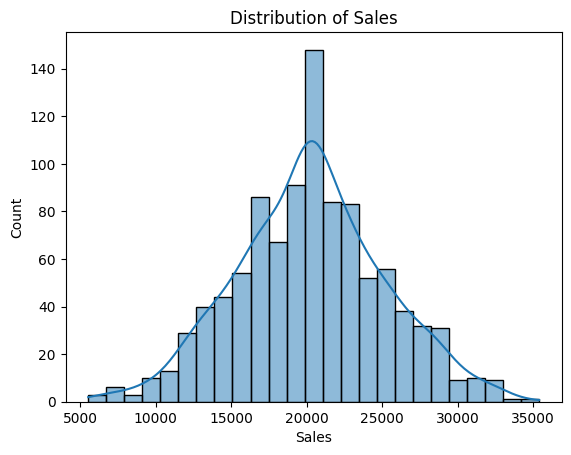

In [54]:
#Univariate Analysis
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

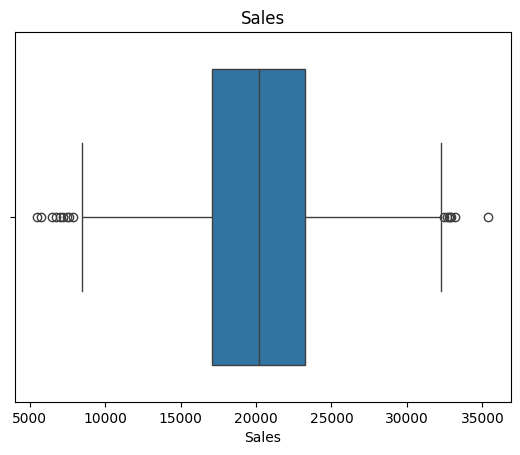

In [63]:

sns.boxplot( x=data['Sales'])
plt.title('Sales')
plt.show()
#

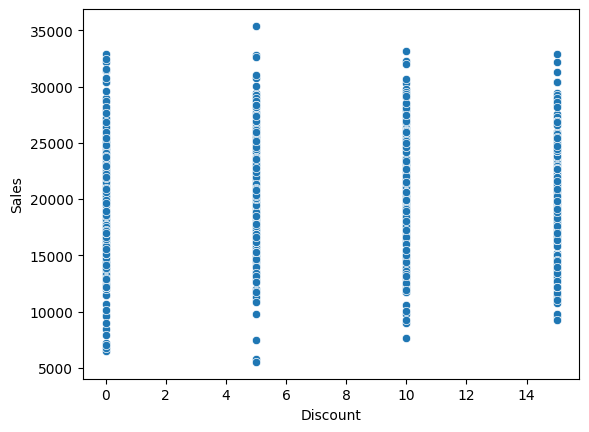

In [65]:
sns.scatterplot(x='Discount', y='Sales', data=data)
plt.show()

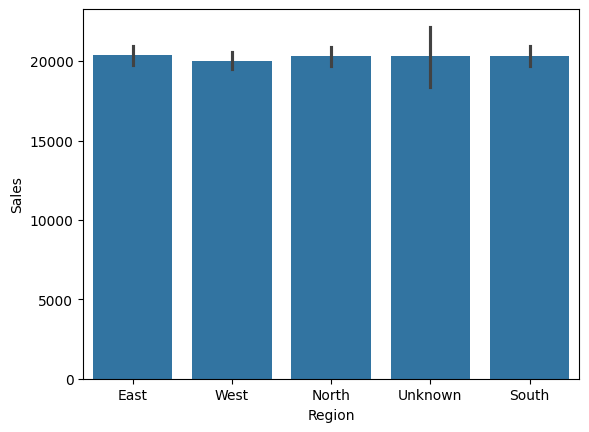

In [67]:
sns.barplot(x='Region', y='Sales', data=data)
plt.show()

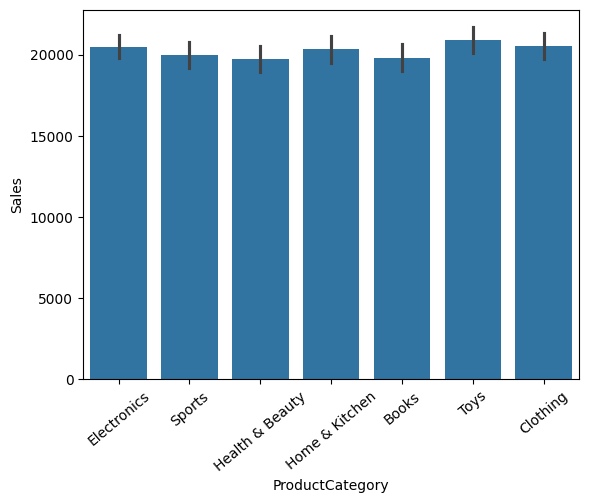

In [72]:
sns.barplot(x='ProductCategory', y='Sales', data=data)
plt.xticks(rotation=40)
plt.show()

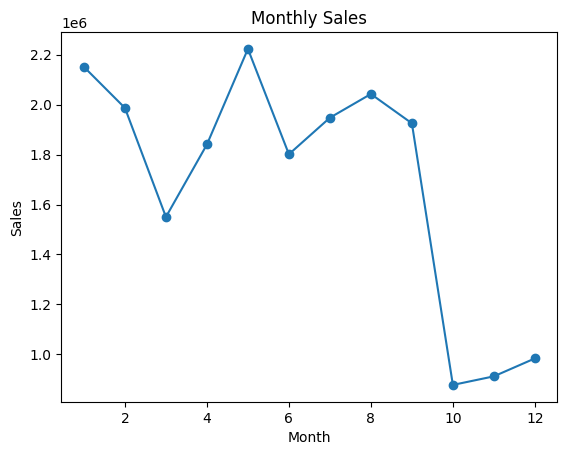

In [76]:
#time series
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
Monthly_sales=data.groupby('Month')['Sales'].sum()
Monthly_sales.plot(kind ='line', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

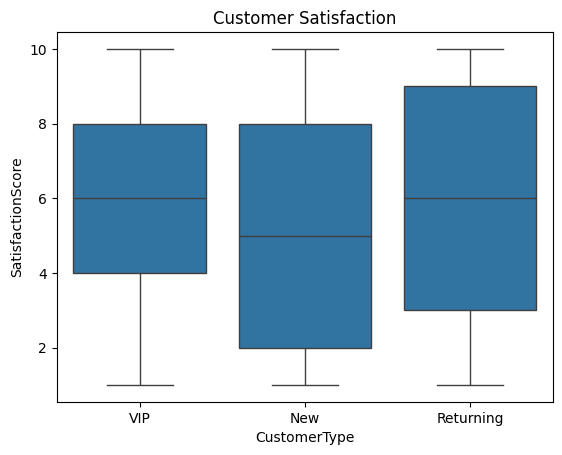

In [79]:
sns.boxplot(x='CustomerType', y='SatisfactionScore', data=data)
plt.title('Customer Satisfaction')
plt.show()